In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

MASTER = Path.home() / "Desktop/hbn_project/data/interim/NIH_TempDisc_pheno_diagnosis.csv"
df = pd.read_csv(MASTER, low_memory=False)
print("Loaded:", df.shape)

# --- 1) Identify Picture Sequence Memory columns ---
prefix = "NIH_final,NIH_Picture_Seq_"
ps_cols = [c for c in df.columns if c.startswith(prefix)]

print(f"Found Picture Sequence cols: {len(ps_cols)}")
for c in ps_cols:
    print(" •", c)


Loaded: (2076, 180)
Found Picture Sequence cols: 8
 • NIH_final,NIH_Picture_Seq_Age_Corr_Stnd
 • NIH_final,NIH_Picture_Seq_Computed_Score
 • NIH_final,NIH_Picture_Seq_Inst_Breakoff
 • NIH_final,NIH_Picture_Seq_Inst_Status
 • NIH_final,NIH_Picture_Seq_Itm_Cnt
 • NIH_final,NIH_Picture_Seq_Raw
 • NIH_final,NIH_Picture_Seq_Rescored
 • NIH_final,NIH_Picture_Seq_Uncorr_Stnd


,n_missing,missing_pct,n_rows,n_present
"NIH_final,NIH_Picture_Seq_Rescored","2,076",100.0%,2076,0
"NIH_final,NIH_Picture_Seq_Age_Corr_Stnd","2,048",98.7%,2076,28
"NIH_final,NIH_Picture_Seq_Computed_Score","2,048",98.7%,2076,28
"NIH_final,NIH_Picture_Seq_Inst_Breakoff","2,048",98.7%,2076,28
"NIH_final,NIH_Picture_Seq_Inst_Status","2,048",98.7%,2076,28
"NIH_final,NIH_Picture_Seq_Itm_Cnt","2,048",98.7%,2076,28
"NIH_final,NIH_Picture_Seq_Raw","2,048",98.7%,2076,28
"NIH_final,NIH_Picture_Seq_Uncorr_Stnd","2,048",98.7%,2076,28


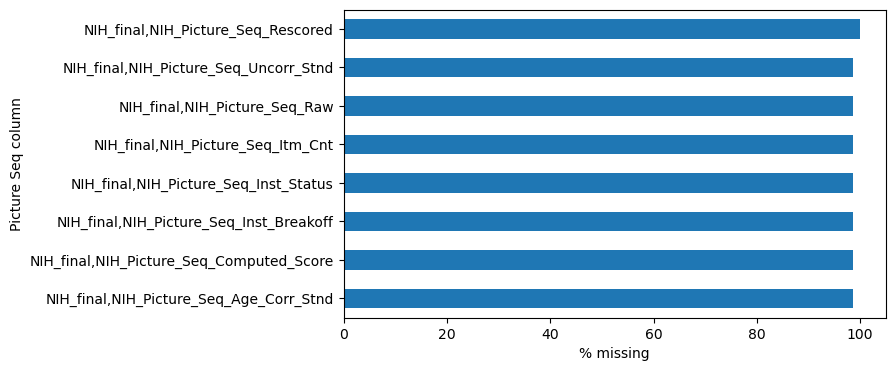

In [2]:

# --- 2) Per-column missingness table (counts & %) ---
col_missing = (
    df[ps_cols].isna()
      .agg(['sum','mean'])
      .T.rename(columns={'sum':'n_missing', 'mean':'missing_pct'})
)
col_missing['n_rows'] = len(df)
col_missing['n_present'] = col_missing['n_rows'] - col_missing['n_missing']
col_missing = col_missing.sort_values('missing_pct', ascending=False)

display(col_missing.style.format({'missing_pct': '{:.1%}', 'n_missing': '{:,.0f}', 'n_present':'{:,.0f}'}))

# bar chart
ax = (col_missing['missing_pct']*100).sort_values().plot(kind='barh', figsize=(7,4))
ax.set_xlabel('% missing'); ax.set_ylabel('Picture Seq column'); plt.show()


In [3]:
# --- 3) Per-participant completeness across the PS columns ---
row_missing_frac = df[ps_cols].isna().mean(axis=1)           # 0.0 = none missing, 1.0 = all missing
row_bins = pd.cut(row_missing_frac, bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], right=False)
row_summary = row_bins.value_counts().sort_index().rename('n_participants').to_frame()
row_summary['pct_participants'] = row_summary['n_participants'] / len(df)
display(row_summary.style.format({'pct_participants': '{:.1%}', 'n_participants': '{:,.0f}'}))

# list EIDs that are completely missing all PS fields
eid_col = next((c for c in df.columns if c.endswith('_EID') or c == '_EID' or c == 'EID'), None)
if eid_col:
    all_missing_idx = row_missing_frac.eq(1.0)
    print("Participants with ALL PS fields missing:", int(all_missing_idx.sum()))
    display(df.loc[all_missing_idx, [eid_col] + ps_cols].head(10))


,n_participants,pct_participants
"[0.0, 0.1)",0,0.0%
"[0.1, 0.2)",28,1.3%
"[0.2, 0.3)",0,0.0%
"[0.3, 0.4)",0,0.0%
"[0.4, 0.5)",0,0.0%
"[0.5, 0.6)",0,0.0%
"[0.6, 0.7)",0,0.0%
"[0.7, 0.8)",0,0.0%
"[0.8, 0.9)",0,0.0%
"[0.9, 1.0)",0,0.0%


Participants with ALL PS fields missing: 2048


,_EID,"NIH_final,NIH_Picture_Seq_Age_Corr_Stnd","NIH_final,NIH_Picture_Seq_Computed_Score","NIH_final,NIH_Picture_Seq_Inst_Breakoff","NIH_final,NIH_Picture_Seq_Inst_Status","NIH_final,NIH_Picture_Seq_Itm_Cnt","NIH_final,NIH_Picture_Seq_Raw","NIH_final,NIH_Picture_Seq_Rescored","NIH_final,NIH_Picture_Seq_Uncorr_Stnd"
0,NDARAA306NT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NDARAA504CRN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDARAB055BPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDARAB348EWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDARAB458VK9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NDARAB514MAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NDARAB756JDJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NDARAB977GFB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NDARAC331VEH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NDARAC350BZ0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
